In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.14.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
type(train_labels)

numpy.ndarray

In [5]:
len(train_labels)


60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

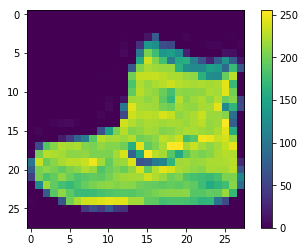

In [10]:
%matplotlib inline  
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0


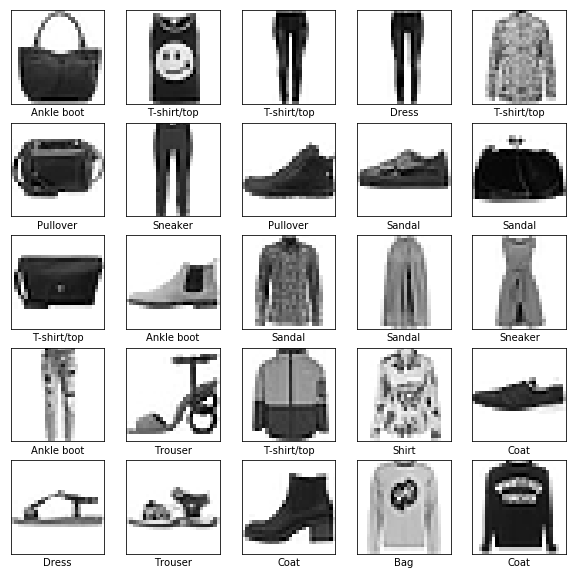

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+100], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4856 - acc: 0.8269
Epoch 2/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3636 - acc: 0.8669
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3270 - acc: 0.8800
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3050 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2895 - acc: 0.8907
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2740 - acc: 0.8980
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2614 - acc: 0.9014
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2497 - acc: 0.9060
Epoch 9/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2409 - acc: 0.9094
Epoch 10/10
60000/60000 [==============================] - 5s 79us/sample - loss: 

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)


10000/10000 [==============================] - 1s 53us/sample - loss: 0.3486 - acc: 0.8739
Test accuracy: 0.8739


In [28]:
predictions = model.predict(test_images)
np.argmax(predictions[0])

9